## 포트폴리오의 국가별 매출분포

1. 포트폴리오 비중 및 국가별 매출분포 호출/전처리
2. 합병
3. 피벗

In [158]:
import pandas as pd
import seaborn as sns

1. 포트폴리오 비중 및 국가별 매출분포 호출/전처리

In [159]:
pf = pd.read_excel('pf_weights.xlsx')

In [160]:
pf.columns = pf.columns.astype(str)

In [161]:
pf = pf.melt(id_vars='Unnamed: 0', value_vars=['2014-01-08 00:00:00', '2014-04-20 00:00:00', '2014-11-10 00:00:00'], var_name='Periods', value_name='weight')

In [162]:
pf = pf.rename({'Unnamed: 0':'ticker'}, axis=1)

In [163]:
pf['Periods'] = pd.to_datetime(pf['Periods'].apply(lambda x: x[:10]))

In [164]:
pf

,ticker,Periods,weight
0,TEF-ES,2014-01-08,0.05
1,ARM-GB,2014-01-08,0.07
2,ML-FR,2014-01-08,0.09
3,DUE-DE,2014-01-08,0.10
4,RWE-DE,2014-01-08,0.12
5,VIS-ES,2014-01-08,0.15
6,SOON-CH,2014-01-08,0.02
7,SU-FR,2014-01-08,0.10
8,AAPL-US,2014-01-08,0.30
9,TEF-ES,2014-04-20,0.08


In [165]:
georev = pd.read_excel('geo_revenue.xlsx')

In [166]:
georev = georev[['company_name', 'ticker', 'latest_fiscal_yearend', 'region_name', 'layer_number', 'est_percent']]

In [167]:
georev = georev[georev['layer_number'] == 1]

In [168]:
georev

,company_name,ticker,latest_fiscal_yearend,region_name,layer_number,est_percent
1,Telefonica SA,TEF-ES,2013-12-31,Americas,1,51.274261
2,Telefonica SA,TEF-ES,2013-12-31,Europe,1,48.725739
35,ARM Holdings PLC,ARM-GB,2013-12-31,Americas,1,39.364676
36,ARM Holdings PLC,ARM-GB,2013-12-31,Africa and Middle East,1,0.058342
37,ARM Holdings PLC,ARM-GB,2013-12-31,Asia/Pacific,1,51.297715
38,ARM Holdings PLC,ARM-GB,2013-12-31,Europe,1,9.279268
156,Compagnie Generale des Etablissements Michelin,ML-FR,2013-12-31,Asia/Pacific,1,3.594199
157,Compagnie Generale des Etablissements Michelin,ML-FR,2013-12-31,Americas,1,44.081054
158,Compagnie Generale des Etablissements Michelin,ML-FR,2013-12-31,Africa and Middle East,1,12.000382
159,Compagnie Generale des Etablissements Michelin,ML-FR,2013-12-31,Europe,1,40.324365


2. 합병

In [169]:
# merge에 direction 쓰려면 정렬 먼저

pf = pf.sort_values(['Periods'])
georev = georev.sort_values(['latest_fiscal_yearend'])

In [170]:
# by에 사용되는 칼럼헤드는 합병되는 두 데이터셋 모두 동일해야 함. (예. 하나는 Ticker이고 다른 하나는 ticker이면 안됨)

pf_georev = pd.merge_asof(pf, georev, left_on='Periods', right_on='latest_fiscal_yearend', by='ticker', direction='backward')

In [171]:
pf_georev

,ticker,Periods,weight,company_name,latest_fiscal_yearend,region_name,layer_number,est_percent
0,TEF-ES,2014-01-08,0.05,Telefonica SA,2013-12-31,Europe,1.0,48.725739
1,ARM-GB,2014-01-08,0.07,ARM Holdings PLC,2013-12-31,Asia/Pacific,1.0,51.297715
2,ML-FR,2014-01-08,0.09,Compagnie Generale des Etablissements Michelin,2013-12-31,Asia/Pacific,1.0,3.594199
3,DUE-DE,2014-01-08,0.10,Duerr AG,2013-12-31,Asia/Pacific,1.0,34.514588
4,RWE-DE,2014-01-08,0.12,RWE AG,2013-12-31,Asia/Pacific,1.0,0.423588
5,VIS-ES,2014-01-08,0.15,Viscofan SA,2013-12-31,Asia/Pacific,1.0,17.088602
6,SOON-CH,2014-01-08,0.02,NaN,NaT,NaN,NaN,NaN
7,SU-FR,2014-01-08,0.10,SCHNEIDER ELECTRIC SE,2013-12-31,Americas,1.0,31.260673
8,AAPL-US,2014-01-08,0.30,NaN,NaT,NaN,NaN,NaN
9,AAPL-US,2014-04-20,0.30,NaN,NaT,NaN,NaN,NaN


3. 피벗

In [181]:
pf_georev['wt_exp'] = pf_georev['weight'] * pf_georev['est_percent']

C:\Users\jchoi02\AppData\Local\Temp/ipykernel_28928/2296589402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_georev['wt_exp'] = pf_georev['weight'] * pf_georev['est_percent']


In [182]:
pf_georev_pivot = pd.pivot_table(pf_georev, index=['Periods'], columns=['region_name'], values=['wt_exp'], aggfunc='sum')

In [183]:
pf_georev_pivot

wt_exp                        
region_name  Americas Asia/Pacific     Europe
Periods                                      
2014-01-08   3.126067     9.979898   2.436287
2014-04-20   5.314314     7.263123   7.119315
2014-11-10   3.126067    11.484942  10.225171

In [184]:
pf_georev_pivot = pf_georev_pivot['wt_exp'].fillna(0)

In [185]:
pf_georev_pivot

region_name,Americas,Asia/Pacific,Europe
Periods,,,
2014-01-08,3.126067,9.979898,2.436287
2014-04-20,5.314314,7.263123,7.119315
2014-11-10,3.126067,11.484942,10.225171


In [186]:
pf_georev_pivot = pf_georev_pivot.reset_index()

In [187]:
pf_georev_pivot.columns.unique()

Index(['Periods', 'Americas', 'Asia/Pacific', 'Europe'], dtype='object', name='region_name')

In [189]:
pf_georev_pivot_melt = pf_georev_pivot.melt(id_vars='Periods', value_vars=['Americas', 'Asia/Pacific', 'Europe'], var_name='Region', value_name='RevExp')

In [190]:
pf_georev_pivot_melt

,Periods,Region,RevExp
0,2014-01-08,Americas,3.126067
1,2014-04-20,Americas,5.314314
2,2014-11-10,Americas,3.126067
3,2014-01-08,Asia/Pacific,9.979898
4,2014-04-20,Asia/Pacific,7.263123
5,2014-11-10,Asia/Pacific,11.484942
6,2014-01-08,Europe,2.436287
7,2014-04-20,Europe,7.119315
8,2014-11-10,Europe,10.225171


In [191]:
pf_georev_pivot_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Periods  9 non-null      datetime64[ns]
 1   Region   9 non-null      object        
 2   RevExp   9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 344.0+ bytes


<AxesSubplot:xlabel='Periods', ylabel='RevExp'>

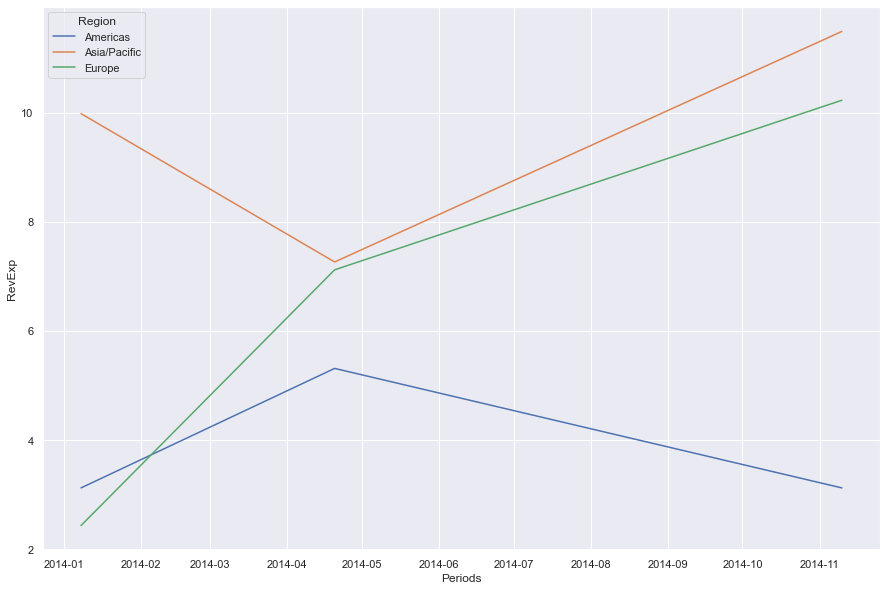

In [192]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=pf_georev_pivot_melt, x="Periods", y="RevExp", hue="Region")